# Sentiment analysis with DISTILBERT via ktrain

In [ ]:
# load and import librarys
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [ ]:
pip install ktrain

     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 6.8 MB 40.0 MB/s 
     |████████████████████████████████| 981 kB 47.0 MB/s 
     |████████████████████████████████| 263 kB 45.7 MB/s 
     |████████████████████████████████| 2.8 MB 40.1 MB/s 
     |████████████████████████████████| 1.2 MB 45.0 MB/s 
     |████████████████████████████████| 468 kB 47.2 MB/s 
     |████████████████████████████████| 596 kB 48.4 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
     |████████████████████████████████| 61 kB 507 kB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=0746efcf7b036c20370f3180f86a6fba6d66a39323c3843c5581d714b03b3a06
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=3f58e636f47296dc

In [ ]:
import ktrain
from ktrain import text

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 12345

In [ ]:
#check GPU out
!nvidia-smi

Tue Jan 11 08:03:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import data
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Wikishop/toxic_comments.csv')
#to save a time and resources grab only 1000 rows
data = data.sample(1000, random_state=random_state).reset_index(drop=True)
data.head()

,text,toxic
0,Ahh shut the fuck up you douchebag sand nigger...,1
1,"""\n\nREPLY: There is no such thing as Texas Co...",0
2,"Reply\nHey, you could at least mention Jasenov...",0
3,"Thats fine, there is no deadline ) chi?",0
4,"""\n\nDYK nomination of Mustarabim\n Hello! You...",0


In [ ]:
#classes proportion
data['toxic'].value_counts(normalize=True)

0    0.901
1    0.099
Name: toxic, dtype: float64

In [ ]:
# brake off features and targets from a dataset
X = data['text']
y = data['toxic']

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=random_state, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=random_state, stratify=y_test)

In [ ]:
sets = [X_train, X_valid, X_test, y_train, y_valid, y_test]
for _ in sets:
    print(_.shape)

(600,)
(200,)
(200,)
(600,)
(200,)
(200,)


In [ ]:
# import BERT-base pretrained model and load the BERT tokenizer
model_name = 'distilbert-base-uncased'
trans = text.Transformer(model_name, maxlen=512, class_names=y.unique())

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
#pass train and test data to the transformer
train_data = trans.preprocess_train(X_train.to_numpy(), y_train.to_numpy())
test_data = trans.preprocess_train(X_test.to_numpy(), y_test.to_numpy())

preprocessing train...
language: en
train sequence lengths:
	mean : 68
	95percentile : 223
	99percentile : 553


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 67
	95percentile : 200
	99percentile : 415


Is Multi-Label? False


In [ ]:
#define the model
model = trans.get_classifier()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
37/37 [==============================] - 62s 2s/step - loss: 0.1903 - accuracy: 0.9020
Epoch 2/10
37/37 [==============================] - 61s 2s/step - loss: 0.1877 - accuracy: 0.9007
Epoch 3/10
37/37 [==============================] - 61s 2s/step - loss: 0.1574 - accuracy: 0.9298
Epoch 4/10
37/37 [==============================] - 61s 2s/step - loss: 0.1621 - accuracy: 0.9572
Epoch 5/10
37/37 [==============================] - 61s 2s/step - loss: 0.3096 - accuracy: 0.8699
Epoch 6/10
37/37 [==============================] - 61s 2s/step - loss: 0.3618 - accuracy: 0.8955
Epoch 7/10
37/37 [==============================] - 44s 1s/step - loss: 1.0372 - accuracy: 0.8561


done.
Visually inspect loss plot and select learning rate associated with falling loss


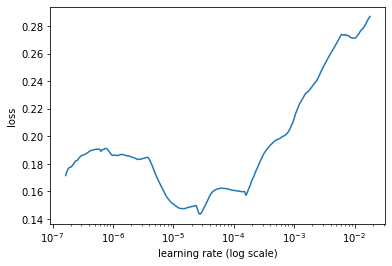

In [ ]:
#find the best learning rate out
learner.lr_find(show_plot=True, max_epochs=10)

In [ ]:
#learning on one epoch
learner.fit_onecycle(0.0005, 1)



begin training using onecycle policy with max lr of 0.0005...
38/38 [==============================] - 82s 2s/step - loss: 0.2704 - accuracy: 0.9233 - val_loss: 0.3034 - val_accuracy: 0.9000


In [ ]:
#test the model
learner.validate(class_names=list(y.unique()))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95       180
           0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[180,   0],
       [ 20,   0]])

#Conclusion

As we see fine-tuned BERT shows better resaults even on much less data